<a href="https://colab.research.google.com/github/aschnapp/SurvITE_Reproduce/blob/main/Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
# sample data
import requests
import io

response = requests.get('https://raw.githubusercontent.com/chl8856/survITE/d7f217fb2bc2406ec11656be49c4fc29156372fb/data/tr_data.npz')
response.raise_for_status()
npz = np.load(io.BytesIO(response.content))

# response_te = requests.get('https://raw.githubusercontent.com/chl8856/survITE/d7f217fb2bc2406ec11656be49c4fc29156372fb/data/te_data.npz')
# response_te.raise_for_status()
# npz = np.load(io.BytesIO(response_te.content))
print(list(npz.keys()))
te_x = npz['x']
te_a = npz['a']
te_t = npz['t']
te_y = npz['y']

print('X data')
print(te_x)
print(te_x.shape)

print('a data')
print(te_a)
print(te_a.shape)

print('t data')
print(te_t) #max and min values are 30.0 and 1.0
print(te_t.shape)

print('y data')
print(te_y)
print(te_y.shape)


['x', 'a', 't', 'y']
X data
[[-0.86089986 -2.07272029 -0.30700235 ... -0.76261147 -0.37664848
   0.46294596]
 [-0.89201575 -1.88150989 -0.92411839 ... -1.58928698  0.06541155
   0.09249244]
 [ 1.22571904  0.87595506 -0.96365153 ... -0.206866    0.69947509
  -0.53299544]
 ...
 [ 1.61543496  1.46029479  0.94726507 ... -0.37694224  0.92250726
   0.0087917 ]
 [-0.386835    1.28222598 -1.23494011 ... -1.39306658 -1.38504057
  -1.42118923]
 [ 0.83823938  0.32325428  3.28606781 ...  0.76809525  0.51030666
   0.79671443]]
(5000, 10)
a data
[1 1 1 ... 0 0 1]
(5000,)
t data
[30. 30. 12. ... 30. 23. 22.]
(5000,)
y data
[0. 0. 1. ... 0. 1. 0.]
(5000,)


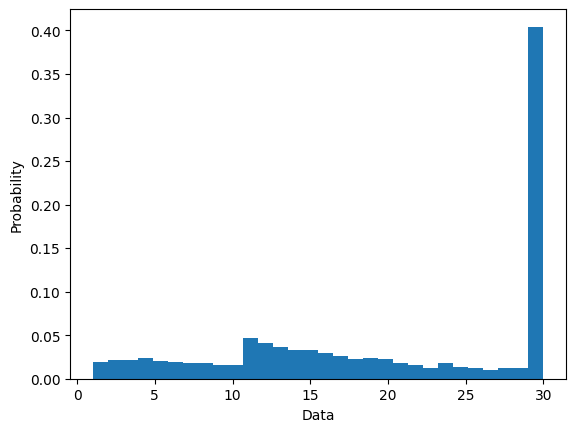

In [ ]:
import matplotlib.pyplot as plt
plt.hist(te_t, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

10
100


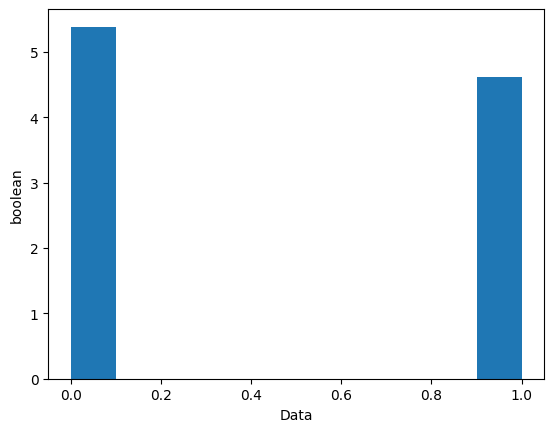

In [ ]:
plt.hist(te_y, density=True)  # density=False would make counts
plt.ylabel('boolean')
plt.xlabel('Data');

n = 10
rho = 0.2
# 1x10 matrix of zeros as means
mean = np.zeros(n)
print(mean.size)

cov =(1-rho)*np.eye(n) + rho * np.ones(n)*(np.ones(n).T)
print(cov.size)


In [ ]:
X = np.random.multivariate_normal(mean, cov, 5000)

In [ ]:
my_array = np.random.binomial(n=1, p=0.5, size=(10,10))
print(my_array)

[[1 0 1 0 1 0 0 1 0 0]
 [1 1 1 0 0 0 1 0 1 1]
 [0 1 0 0 0 0 0 1 1 0]
 [1 1 0 0 1 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 0 0]
 [1 0 1 1 0 0 0 1 1 0]
 [0 0 0 0 0 0 1 1 0 0]
 [1 1 1 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 1 1 0]
 [1 1 1 0 0 0 1 0 0 1]]


In [ ]:
# time points
t = np.arange(1,31,1) # since te_t is also values between 1.0 and 30.0

# different alphas depending on the experiment S1, S2,.. 
alpha_S1 = 0

def sigmoid(x):
  return 1 / (1 + np.exp(-x))



def lambda_function(T, X, a):
  y = []
  for t in T:
    if t <= 9: 
      y.append(0.1 * sigmoid(-5 * (X[:, 0])**2 - a * (np.where(X[:, 2] >= 0, 1, 0) + 0.5)))
    else:
      y.append(0.1 * sigmoid(10 * X[:, 1] - a * (np.where(X[:, 2] >= 0, 1, 0) + 0.5)))

  return np.array(y)

def lambda_function2(T, X, a):
  y = []
  for i, x in enumerate(X):
    if T[i] <= 10:
      y.append(0.1 * sigmoid(-5 * (x[0])**2 - a * (int(x[2] >= 0) + 0.5)))
    else:
      y.append(0.1 * sigmoid(10 * x[1] - a * (int(x[2] >= 0) + 0.5)))
    
  return np.array(y)

def lambda_function_C(T, X):
  y = np.zeros(30)
  for t in T:
    y[t] = 0.01 * sigmoid(10 * (X[:,3])**2)

  y[29] = 1

  return y

S1 = lambda_function(t, X, 0)

# S2 = lambda_function_C(t, X)

PS3 = [0, 1]
PS4 = [8, 9]
zeta = [1, 3]

# al = alpha(PS4, X, 3)
# print(np.sum(al))

In [ ]:
# experiment S1

t = np.random.randint(low=1.0, high=30.0, size=(5000))
a = 0

y = lambda_function2(t, X, a)
print(y.shape)


(5000,)


In [ ]:
print(int(9 > 3))
print(int(9 < 3))

1
0


In [ ]:
S1.shape


(30, 5000)

In [ ]:
def draw_sample(haz_fn,censor_fn=None):
  t_sample = 30
  delta = 0
  #start with t=1
  for t in range(1,31):
    prob_t = haz_fn[t]
    prob_t_censor = censor_fn[t]
    draw = np.random.uniform()
    #using hazard function see if event occured at t
    while(draw<=prob_t and draw<=prob_t_censor):
      draw = np.random.uniform()
    if(draw<=prob_t):
      t_sample =t
      delta=1
      break 
    if(draw<=prob_t_censor):
      t_sample = t
      delta = 0
      break
  return t_sample,delta
    

In [ ]:
import torch

In [ ]:
a  = torch.tensor([[1.0,2.0,3.0],[3.0,4.0,2.0]])

In [ ]:
print(a)

torch.sum(a,dim=0)


tensor([[1., 2., 3.],
        [3., 4., 2.]])


tensor([4., 6., 5.])